Lista de cosas por hacer:
- [ ] Más análisis
    - [x] Riqueza léxica
    - [x] Que palabras prefieren
    - [ ] Longitud media de frases
    - [x] Longitud media de palabras
    - [x] De todos los textos leidos, que palabras aparecen más, cuáles menos y en que tipo son más frecuentes.(ToDo: Está a medias)
- [x] Dividir dataset en 60/20/20 variados
- [ ] Entrenarlo y evaluar su capacidad de deteccion

Comienzo de la práctica

# AI vx Human 

## Index

1. [Data pre-processing](#data-pre-processing-and-required-imports)
2. [Lexical richness](#lexical-richness)

## Data pre-processing and required imports

In [1]:
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd #procesado del csv pasa E/S
import matplotlib as plt #printeo
import random #operaciones matematicas
from metodos import * #importamos metodos para una mayor legibilidad
import os 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/ubuntu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:

path_Ruben = '/home/ubuntu/Escritorio/repos/segundo-cuatri/NLP/NLP-practicas_grupo/proyecto-final'
for dirname, _, filenames in os.walk(path_Ruben):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/ubuntu/Escritorio/repos/segundo-cuatri/NLP/NLP-practicas_grupo/proyecto-final/Temas.txt
/home/ubuntu/Escritorio/repos/segundo-cuatri/NLP/NLP-practicas_grupo/proyecto-final/notebook_final.ipynb
/home/ubuntu/Escritorio/repos/segundo-cuatri/NLP/NLP-practicas_grupo/proyecto-final/metodos.py
/home/ubuntu/Escritorio/repos/segundo-cuatri/NLP/NLP-practicas_grupo/proyecto-final/archive/AI_Human.csv
/home/ubuntu/Escritorio/repos/segundo-cuatri/NLP/NLP-practicas_grupo/proyecto-final/.ipynb_checkpoints/notebook_final-checkpoint.ipynb
/home/ubuntu/Escritorio/repos/segundo-cuatri/NLP/NLP-practicas_grupo/proyecto-final/__pycache__/metodos.cpython-310.pyc


In [3]:
path_Ruben += '/archive/AI_Human.csv'
datos = pd.read_csv(path_Ruben)
datos.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [4]:
datos_totales = (datos['generated']).count()
datos_humanos = (datos['generated'] == 0.0).sum()
print("Datos totales: ", datos_totales)
print("Humanos: ", datos_humanos)
print("IA: ", datos_totales - datos_humanos)

Datos totales:  487235
Humanos:  305797
IA:  181438


In [5]:
# token = nltk.word_tokenize(datos['text'][0])
# nltk.pos_tag(token)

### Selection of the tokens

The selection of the AI and human tokens was made using randon numbers in order to get the most fair sample of data.

In [6]:
#dividing the data in 3 groups: training, validation and test
tokens_ia = []
tokens_human = []

tokens_cvalidation=[]

tokens_test=[]


limit = 25000
print("This is the " + str(round(((limit*100 )/ datos_totales),2)) + "% of the data")
limit_training = limit*0.6
limit_validation = limit*0.2

while True:
    valor = random.randint(0, len(datos['text']))
    token = nltk.word_tokenize(datos['text'][valor])
    
    if datos['generated'][valor] == 1.0 and len(tokens_ia)<limit_training//2:
        tokens_ia.append(token)
    elif datos['generated'][valor] == 0.0 and len(tokens_human)<limit_training//2:
        tokens_human.append(token)
    elif len(tokens_cvalidation) < limit_validation:
        tokens_cvalidation.append(token)
    elif len(tokens_test) < limit_validation:
        tokens_test.append(token)
    else:
        break

print ("Training \t Cross Validation \t Test")
print (len(tokens_ia)+len(tokens_human), "\t\t", len(tokens_cvalidation), "\t\t\t", len(tokens_test))
print("***************************************************")
print("AI\t\tHuman")
print(len(tokens_ia), "\t\t", len(tokens_human))
# print("AI: ", len(tokens_ia))
# print("Human: ", len(tokens_human))


This is the 5.13% of the data
Training 	 Cross Validation 	 Test
15000 		 5000 			 5000
***************************************************
AI		Human
7500 		 7500


## Lexical Richness

### AI lexical richness

In [7]:
medium_richness_ia = 0
num = 0

for i in range(0, len(tokens_ia)):
    medium_richness_ia += lexical_richness(tokens_ia[i])
    num += 1
medium_richness_ia = medium_richness_ia/num
medium_richness_ia

0.44910042633731506

### Human lexical richness

In [8]:
medium_richness_human = 0
num = 0

for i in range(0, len(tokens_human)):
    #print(i, tokens_human[i])
    medium_richness_human = lexical_richness(tokens_human[i])+medium_richness_human
    num += 1


medium_richness_human = medium_richness_human/num
medium_richness_human

0.42876240880138655

We're going to chech the performance and we're gonna display the accuracy of the tagged words

In [9]:
tagged_sents = tokens_ia

def pos_tagged_words(tagged_sents):
    tagged_words = []
    for sent in tagged_sents:
        for word in sent:
            tagged_words.append(word)
    return tagged_words

tagged_words = pos_tagged_words(tagged_sents)
tagged_words

['The',
 'idea',
 'that',
 'we',
 'should',
 'always',
 'do',
 'something',
 'rather',
 'than',
 'waiting',
 'for',
 'things',
 'to',
 'happen',
 'is',
 'one',
 'that',
 'has',
 'been',
 'echoed',
 'by',
 'many',
 'successful',
 'individuals',
 'throughout',
 'history',
 '.',
 'This',
 'mindset',
 'can',
 'be',
 'seen',
 'in',
 'the',
 'way',
 'that',
 'entrepreneurs',
 'are',
 'Bike',
 'Gates',
 'and',
 'Steve',
 'Jobs',
 'went',
 'about',
 'building',
 'their',
 'businesses',
 '.',
 'They',
 'did',
 "n't",
 'wait',
 'for',
 'opportunities',
 'to',
 'come',
 'to',
 'them',
 ',',
 'but',
 'instead',
 'actively',
 'sought',
 'them',
 'out',
 'and',
 'worked',
 'tirelessly',
 'to',
 'make',
 'them',
 'a',
 'reality',
 '.',
 'This',
 'approach',
 'to',
 'are',
 'has',
 'many',
 'benefits',
 '.',
 'For',
 'one',
 ',',
 'it',
 'helps',
 'to',
 'reduce',
 'stress',
 'and',
 'anxiety',
 '.',
 'When',
 'we',
 'have',
 'a',
 'hair',
 'mean',
 'and',
 'are',
 'actively',
 'working',
 'towards',


### Finding the most common words

### Most common human words

In [10]:
list =[]
for i in range(len(tokens_human)):
    for w in tokens_human[i]:
        list.append(w.lower())
    
fdist_human = nltk.FreqDist(list)
fdist_human.most_common(20)


[('the', 152767),
 ('.', 150082),
 (',', 118009),
 ('to', 108643),
 ('a', 74710),
 ('and', 71332),
 ('of', 60716),
 ('that', 52739),
 ('in', 51735),
 ('is', 48030),
 ('it', 44525),
 ('you', 39825),
 ('they', 34768),
 ('be', 33767),
 ('for', 32136),
 ('have', 29135),
 ('are', 27951),
 ('i', 24744),
 ('not', 24405),
 ('on', 23233)]

### Most common AI words

In [11]:
list =[]
for i in range(len(tokens_ia)):
    for w in tokens_ia[i]:
        list.append(w.lower())
    
fdist_ia = nltk.FreqDist(list)
fdist_ia.most_common(20)

[(',', 155108),
 ('.', 131764),
 ('the', 106881),
 ('and', 89175),
 ('to', 89119),
 ('a', 63516),
 ('of', 61850),
 ('in', 48314),
 ('that', 36246),
 ('is', 33600),
 ('can', 31042),
 ('it', 30635),
 ('for', 30046),
 ('are', 20450),
 ('be', 20255),
 ('on', 19027),
 ('this', 18857),
 ('i', 18530),
 ('their', 17802),
 ("'s", 16085)]

### Removing the sortest and more "useless" words from a linguistic point of view

In [12]:


stop_words = set(stopwords.words('english'))

filtered_tok_ia = []

for token_list in tokens_ia:
    for token in token_list:

        token = token.lower()
        
        token = token.translate(str.maketrans('', '', string.punctuation))

        if token and token not in stop_words:
            filtered_tok_ia.append(token)

fdist_ia = FreqDist(filtered_tok_ia)
print ("AI")
fdist_ia.most_common(20)

AI


[('students', 15082),
 ('people', 11055),
 ('also', 10091),
 ('electoral', 8748),
 ('like', 8325),
 ('may', 8257),
 ('college', 8104),
 ('help', 8033),
 ('time', 7034),
 ('make', 6972),
 ('car', 6820),
 ('one', 6765),
 ('important', 6694),
 ('school', 6441),
 ('states', 6079),
 ('would', 5790),
 ('cars', 5498),
 ('could', 5457),
 ('life', 5427),
 ('usage', 5183)]

In [13]:

stop_words = set(stopwords.words('english'))

filtered_tok_human = []

for token_list in tokens_human:
    for token in token_list:

        token = token.lower()
        
        token = token.translate(str.maketrans('', '', string.punctuation))

        if token and token not in stop_words:
            filtered_tok_human.append(token)

fdist_human = FreqDist(filtered_tok_human)
print ("Human")
freq_reduced = fdist_human.most_common(20)
freq_reduced


Human


[('people', 22223),
 ('would', 21421),
 ('students', 21209),
 ('nt', 16900),
 ('school', 13287),
 ('could', 11454),
 ('car', 11088),
 ('cars', 11032),
 ('get', 10687),
 ('like', 10185),
 ('also', 9807),
 ('one', 9771),
 ('time', 9242),
 ('help', 9138),
 ('many', 8547),
 ('make', 8505),
 ('electoral', 8401),
 ('think', 8001),
 ('college', 7355),
 ('even', 7112)]

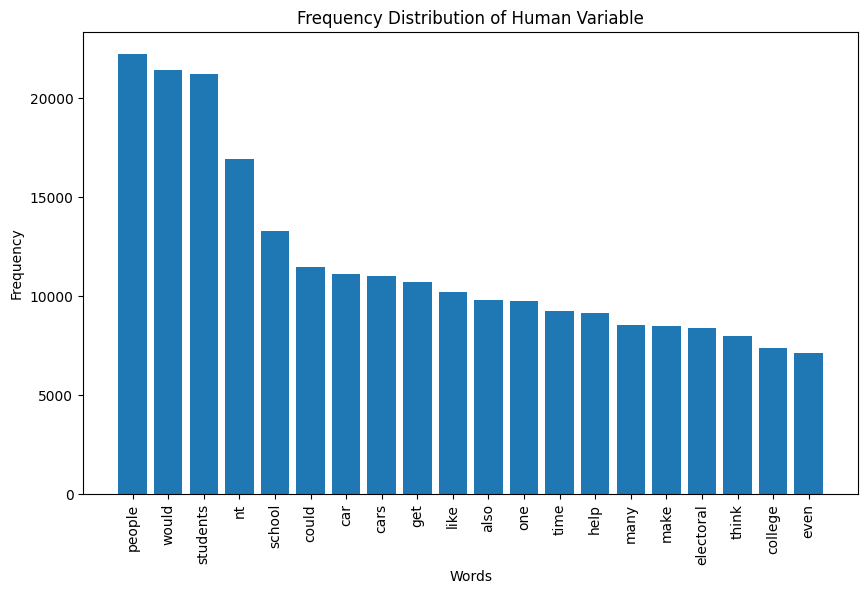

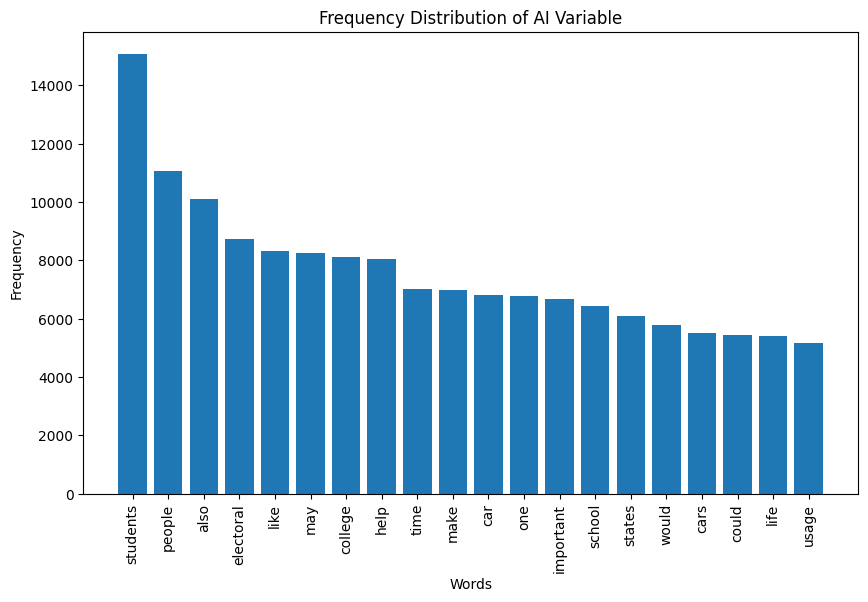

In [14]:


# Plotting the fdist of the human variable

displayWordFreq(fdist_human, 20, True)

displayWordFreq(fdist_ia, 20, False)
